# Phase 1






Data Collection/preparation part.

I have collected data from multiple sources hence I have prepared the data in excel and then i had used.

1. The population of each state: I have taken 2001 population data from : http://cyberjournalist.org.in/census/cenindia.html & 2011 from :https://www.jagranjosh.com/general-knowledge/census-2011-population-in-states-and-union-territories-of-india-1476439733-1
2. Literacy Rate in each state  -- I have taken 2001 data from : https://socialjustice.gov.in/common/76669 & 2011 from :https://www.indiaonlinepages.com/population/literacy-rate-in-india.html

3.area of each state 2011 data from : https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_area  and 2001 from :https://www.sscadda.com/largest-state-in-india/




In [253]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [254]:
# load the data for analysis
df1=pd.read_csv(r"C:\\Users\\Hp\\OneDrive\\Desktop\\capstone project\\india_data.csv")
IPC_crime=pd.read_csv(r"C:\\Users\\Hp\OneDrive\\Desktop\\capstone project\\India_Crime - Copy\\India_Crime - Copy\\01_District_wise_crimes_committed_IPC_2001_2012.csv")
against_sc_crime=pd.read_csv(r"C:\\Users\\Hp\\OneDrive\\Desktop\\capstone project\\India_Crime - Copy\\India_Crime - Copy\\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")


In [255]:
# check the data set top 10 rows
df1.head(10)

,State_UT,Literacy_Rate_2001,Literacy_Rate_2011,Population_of_2001,Population_of_2011,2011_Area_(km2),2001_Area_(km2)
0,Uttar Pradesh,56.3,69.7,166052859,199812341,240928.0,240928.0
1,Maharashtra,76.9,82.9,96752247,112374333,307713.0,307713.0
2,Bihar,47.0,63.8,82878796,104099452,94163.0,94163.0
3,West Bengal,68.6,77.1,80221171,91276115,88752.0,88752.0
4,Andhra Pradesh,60.5,67.7,75727541,84580777,162975.0,162968.0
5,Tamil Nadu,73.5,80.3,62110839,72447030,130058.0,130058.0
6,Madhya Pradesh,63.7,70.6,60385118,72626809,308252.0,308245.0
7,Rajasthan,60.1,67.1,56473122,68548473,342239.0,342239.0
8,Karnataka,66.6,75.6,52733958,61095297,191791.0,191791.0
9,Gujarat,69.1,79.3,50596992,60439692,196024.0,196024.0


In [256]:
# IPC_crime
IPC_crime.head(10)

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3,1,0,0,0,0,0,...,0,1,0,1,0,0,0,4,104,287
6,ANDHRA PRADESH,GUNTUR,2001,182,88,2,54,0,54,82,...,43,1792,7,139,129,378,0,369,2426,7848
7,ANDHRA PRADESH,HYDERABAD CITY,2001,111,113,7,37,0,37,80,...,0,3137,24,118,27,746,0,409,1512,11831
8,ANDHRA PRADESH,KARIMNAGAR,2001,162,85,6,56,0,56,67,...,33,1392,62,414,81,224,0,322,1726,5811
9,ANDHRA PRADESH,KHAMMAM,2001,93,60,1,47,0,47,41,...,73,1026,17,180,336,172,0,209,1450,4582


In [257]:
IPC_crime.rename(columns = {'TOTAL IPC CRIMES':'TOTAL_IPC_CRIMES'}, inplace = True)

lets merge the cirme data and Literacy_Rate to do the analysis

In [258]:
# check the unique values before 
IPC_crime['YEAR'].value_counts()

2012    811
2011    791
2010    779
2009    767
2008    761
2007    743
2006    740
2005    733
2004    729
2003    728
2002    719
2001    716
Name: YEAR, dtype: int64

In [259]:
#pip install pandasql

In [260]:
from pandasql import sqldf
import pandas as pd

In [261]:
crime_df=sqldf('''SELECT STATE_UT,sum(case when YEAR in (2001) THEN TOTAL_IPC_CRIMES end) as _2001_crime,
sum(case when YEAR IN (2011) THEN TOTAL_IPC_CRIMES end) as _2011_crime
FROM  IPC_crime group by 1 ''')

In [262]:
# create the data frame
IPC_crime_V1=pd.DataFrame(crime_df)

In [263]:
# check the entire data frame
IPC_crime_V1

,STATE_UT,_2001_crime,_2011_crime
0,A & N ISLANDS,1316,1586
1,ANDHRA PRADESH,260178,379560
2,ARUNACHAL PRADESH,4684,4572
3,ASSAM,73754,133428
4,BIHAR,176864,271792
5,CHANDIGARH,6794,7084
6,CHHATTISGARH,76920,114436
7,D & N HAVELI,700,744
8,DAMAN & DIU,478,448
9,DELHI UT,108768,106706


In [264]:
# lets check the both the table state and make sure both df has same state name 
#df1.drop('state_sy',axis=1,inplace=True)
df1

,State_UT,Literacy_Rate_2001,Literacy_Rate_2011,Population_of_2001,Population_of_2011,2011_Area_(km2),2001_Area_(km2)
0,Uttar Pradesh,56.3,69.7,166052859,199812341,240928.0,240928.00
1,Maharashtra,76.9,82.9,96752247,112374333,307713.0,307713.00
2,Bihar,47.0,63.8,82878796,104099452,94163.0,94163.00
3,West Bengal,68.6,77.1,80221171,91276115,88752.0,88752.00
4,Andhra Pradesh,60.5,67.7,75727541,84580777,162975.0,162968.00
5,Tamil Nadu,73.5,80.3,62110839,72447030,130058.0,130058.00
6,Madhya Pradesh,63.7,70.6,60385118,72626809,308252.0,308245.00
7,Rajasthan,60.1,67.1,56473122,68548473,342239.0,342239.00
8,Karnataka,66.6,75.6,52733958,61095297,191791.0,191791.00
9,Gujarat,69.1,79.3,50596992,60439692,196024.0,196024.00


In [265]:
# create the unique value for every state
IPC_crime_V1['state_sym'] = IPC_crime_V1['STATE_UT'].replace({'A & N ISLANDS':'ANDN',
'ANDHRA PRADESH':'AP',
'ARUNACHAL PRADESH':'ANP',
'ASSAM':'ASSAM',
'BIHAR':'BIHAR',
'CHANDIGARH':'CHND',
'CHHATTISGARH':'CHTS',
'D & N HAVELI':'DNH',
'DAMAN & DIU':'DD',
'DELHI UT':'DL',
'GOA':'GOA',
'GUJARAT':'GJ',
'HARYANA':'HR',
'HIMACHAL PRADESH':'HP',
'JAMMU & KASHMIR':'JK',
'JHARKHAND':'JARK',
'KARNATAKA':'KA',
'KERALA':'KA',
'LAKSHADWEEP':'LAKSH',
'MADHYA PRADESH':'MP',
'MAHARASHTRA':'MH',
'MANIPUR':'MNP',
'MEGHALAYA':'MGL',
'MIZORAM':'MIZ',
'NAGALAND':'NG',
'ODISHA':'OD',
'PUDUCHERRY':'PD',
'PUNJAB':'PJ',
'RAJASTHAN':'RJ',
'SIKKIM':'SI',
'TAMIL NADU':'TN',
'TRIPURA':'TRI',
'UTTAR PRADESH':'UP',
'UTTARAKHAND':'UTT',
'WEST BENGAL':'WB'
})

In [266]:
df1['state_sym'] = df1['State_UT'].replace({'Uttar Pradesh':'UP',
'Maharashtra':'MH',
'Bihar':'BIHAR',
'West Bengal':'WB',
'Andhra Pradesh':'AP',
'Tamil Nadu':'TN',
'Madhya Pradesh':'MP',
'Rajasthan':'RJ',
'Karnataka':'KA',
'Gujarat':'GJ',
'Orissa':'OD',
'Kerala':'KA',
'Jharkhand':'JARK',
'Assam':'ASSAM',
'Punjab':'PJ',
'Haryana':'HR',
'Chhattisgarh':'CHTS',
'Delhi':'DL',
'Jharkhand':'JARK',
'Uttarakhand':'UTT',
'Himachal Pradesh':'HP',
'Tripura':'TRI',
'Manipur':'MNP',
'Meghalaya':'MGL',
'Nagaland':'NG',
'Goa':'GOA',
'Arunachal Pradesh':'ANP',
'Puducherry':'PD',
'Mizoram':'MIZ',
'Chandigarh':'CHND',
'Sikkim':'SI',
'A & N Islands':'ANDN',
'Dadra & Nagar Haveli':'DNH',
'Daman & Diu':'DD',
'Lakshadweep':'LAKSH'
})

In [267]:
# NOW merge the crime and litrature data
crime_edu=pd.merge(df1,IPC_crime_V1,how="outer",on='state_sym')

In [268]:
#drop extra added coloumn 
crime_edu.drop('STATE_UT',axis=1,inplace=True)

In [269]:
crime_edu['Literacy_Rate_diff']=crime_edu['Literacy_Rate_2011']-crime_edu['Literacy_Rate_2001']
crime_edu['crime_diff']=crime_edu['_2011_crime']-crime_edu['_2001_crime']
crime_edu['area_diff']=crime_edu['2011_Area_(km2)']-crime_edu['2001_Area_(km2)']


In [270]:
# check the dataframe
crime_edu

,State_UT,Literacy_Rate_2001,Literacy_Rate_2011,Population_of_2001,Population_of_2011,2011_Area_(km2),2001_Area_(km2),state_sym,_2001_crime,_2011_crime,Literacy_Rate_diff,crime_diff,area_diff
0,Uttar Pradesh,56.3,69.7,166052859.0,199812341.0,240928.0,240928.00,UP,356258,390270,13.4,34012,0.00
1,Maharashtra,76.9,82.9,96752247.0,112374333.0,307713.0,307713.00,MH,342466,409804,6.0,67338,0.00
2,Bihar,47.0,63.8,82878796.0,104099452.0,94163.0,94163.00,BIHAR,176864,271792,16.8,94928,0.00
3,West Bengal,68.6,77.1,80221171.0,91276115.0,88752.0,88752.00,WB,123126,286394,8.5,163268,0.00
4,Andhra Pradesh,60.5,67.7,75727541.0,84580777.0,162975.0,162968.00,AP,260178,379560,7.2,119382,7.00
5,Tamil Nadu,73.5,80.3,62110839.0,72447030.0,130058.0,130058.00,TN,309602,385758,6.8,76156,0.00
6,Madhya Pradesh,63.7,70.6,60385118.0,72626809.0,308252.0,308245.00,MP,363482,434188,6.9,70706,7.00
7,Rajasthan,60.1,67.1,56473122.0,68548473.0,342239.0,342239.00,RJ,310370,331244,7.0,20874,0.00
8,Karnataka,66.6,75.6,52733958.0,61095297.0,191791.0,191791.00,KA,218196,275200,9.0,57004,0.00
9,Karnataka,66.6,75.6,52733958.0,61095297.0,191791.0,191791.00,KA,207694,344274,9.0,136580,0.00


In [271]:
# check NA 
edu_crime.isna().sum()


State_UT              0
Literacy_Rate_2001    0
Literacy_Rate_2011    0
Population_of_2001    0
Population_of_2011    0
2011_Area_(km2)       0
2001_Area_(km2)       0
state_sy              0
state_sym             0
STATE_UT              0
_2001_crime           0
_2011_crime           0
2001_Area_(km2))      0
dtype: int64

In [272]:
# fill na with mean
edu_crime['2001_Area_(km2)'] = edu_crime['2001_Area_(km2)'].fillna(edu_crime['2001_Area_(km2)'].mean())
edu_crime['2011_Area_(km2)'] = edu_crime['2011_Area_(km2)'].fillna(edu_crime['2011_Area_(km2)'].mean())
    

In [273]:
# check again for missing values
edu_crime.isna().sum()

State_UT              0
Literacy_Rate_2001    0
Literacy_Rate_2011    0
Population_of_2001    0
Population_of_2011    0
2011_Area_(km2)       0
2001_Area_(km2)       0
state_sy              0
state_sym             0
STATE_UT              0
_2001_crime           0
_2011_crime           0
2001_Area_(km2))      0
dtype: int64

Now there is no missing values and  Now the final data data is ready for the Phase 2 analysis. lets do EDA following.

# Phase 2

# 2.1	Analysis of Literacy Rate vs Total Crimes.

In [274]:
# lets import packages
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
# col names of the data frame
crime_edu.columns

Index(['State_UT', 'Literacy_Rate_2001', 'Literacy_Rate_2011',
       'Population_of_2001', 'Population_of_2011', '2011_Area_(km2)',
       '2001_Area_(km2)', 'state_sym', '_2001_crime', '_2011_crime',
       'Literacy_Rate_diff', 'crime_diff', 'area_diff'],
      dtype='object')

<AxesSubplot:xlabel='Literacy_Rate_2001', ylabel='State_UT'>

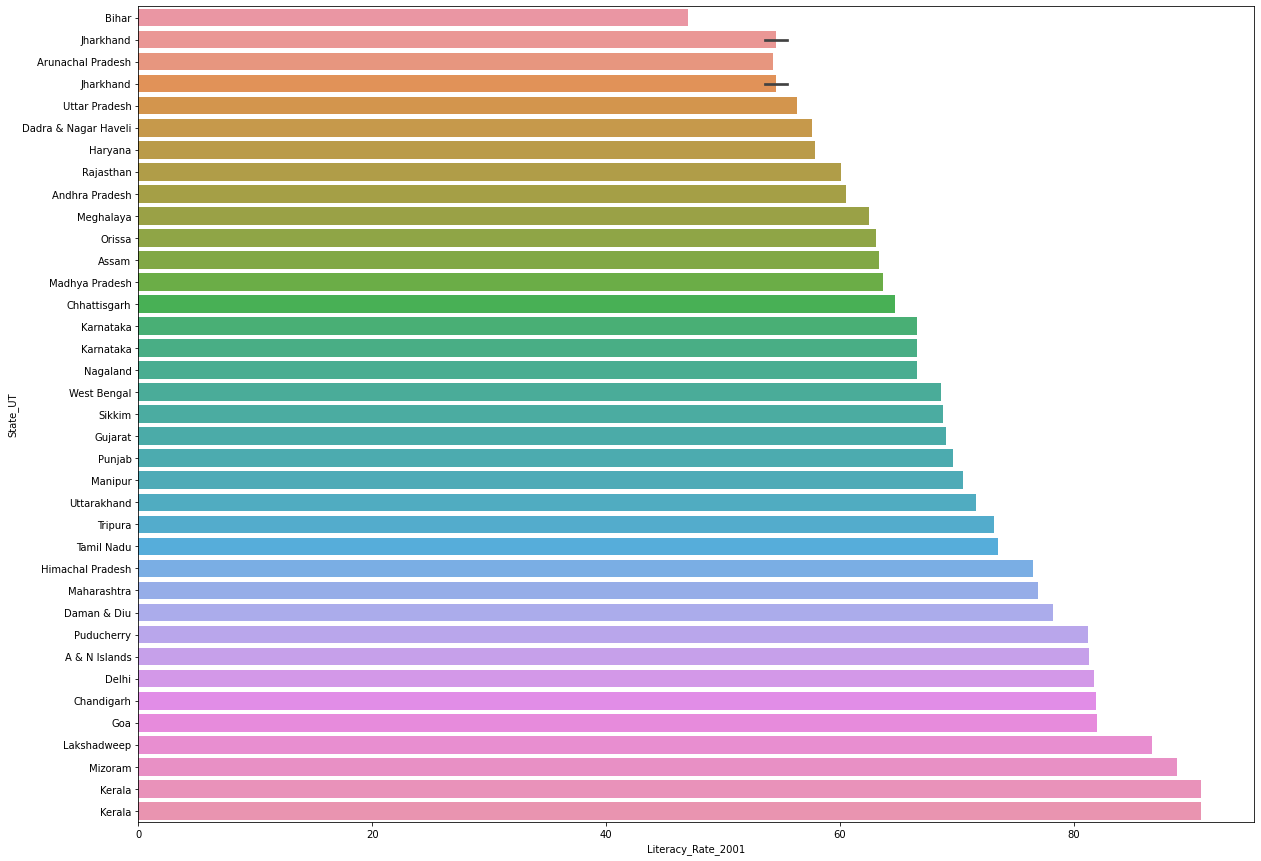

In [276]:
plt.figure(figsize=(20,15))
sns.barplot(x='Literacy_Rate_2001',
            y="State_UT", data=crime_edu,
            order=edu_crime.sort_values('Literacy_Rate_2001').State_UT)

kerala has high education ppl

# Phase 4
Unsupervised ML (Clustering)


In [236]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score,silhouette_samples

import numpy as np


In [279]:
final_df=crime_edu.dropna()

In [244]:

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [280]:
X, y = final_df(n_samples=50, centers=5, n_features=5, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, random_state=50)

TypeError: 'DataFrame' object is not callable